<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_2X/blob/main/GQtest_groupwise_(y_hat)_0_1_0_9_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_2X/groupwise_0.1_0.9'

In [4]:
os.listdir(base_path)

['data_groupwise_0.1_0.9_n20.csv',
 'data_groupwise_0.1_0.9_n30.csv',
 'data_groupwise_0.1_0.9_n60.csv',
 'data_groupwise_0.1_0.9_n120.csv',
 'data_groupwise_0.1_0.9_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.1_0.9_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,-0.138137,119.303026,119.570676,-0.267650
1,0.0,1.0,57.329540,67.934475,0.467387,135.731401,135.461190,0.270211
2,0.0,2.0,45.215694,51.000161,0.140783,106.356637,106.437857,-0.081219
3,0.0,3.0,69.375325,41.455180,-0.568304,120.262200,120.959092,-0.696892
4,0.0,4.0,87.837297,72.508079,0.111376,170.456752,170.441442,0.015310
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,84.769209,31.648250,-0.215535,126.201924,126.269411,-0.067487
19996,999.0,16.0,26.755359,72.918584,0.440937,110.114880,109.787804,0.327076
19997,999.0,17.0,91.511024,97.355535,0.203610,199.070170,199.001142,0.069028
19998,999.0,18.0,74.275808,59.647742,-0.007651,143.915899,143.914060,0.001840


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,-0.138137,119.303026,119.570676,-0.267650
1,0.0,1.0,57.329540,67.934475,0.467387,135.731401,135.461190,0.270211
2,0.0,2.0,45.215694,51.000161,0.140783,106.356637,106.437857,-0.081219
3,0.0,3.0,69.375325,41.455180,-0.568304,120.262200,120.959092,-0.696892
4,0.0,4.0,87.837297,72.508079,0.111376,170.456752,170.441442,0.015310
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,84.769209,31.648250,-0.215535,126.201924,126.269411,-0.067487
19996,999.0,16.0,26.755359,72.918584,0.440937,110.114880,109.787804,0.327076
19997,999.0,17.0,91.511024,97.355535,0.203610,199.070170,199.001142,0.069028
19998,999.0,18.0,74.275808,59.647742,-0.007651,143.915899,143.914060,0.001840


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    68.854520  40.586643 -0.138137  119.303026  119.570676 -0.267650
      1.0    57.329540  67.934475  0.467387  135.731401  135.461190  0.270211
      2.0    45.215694  51.000161  0.140783  106.356637  106.437857 -0.081219
      3.0    69.375325  41.455180 -0.568304  120.262200  120.959092 -0.696892
      4.0    87.837297  72.508079  0.111376  170.456752  170.441442  0.015310
...                ...        ...       ...         ...         ...       ...
999.0 15.0   84.769209  31.648250 -0.215535  126.201924  126.269411 -0.067487
      16.0   26.755359  72.918584  0.440937  110.114880  109.787804  0.327076
      17.0   91.511024  97.355535  0.203610  199.070170  199.001142  0.069028
      18.0   74.275808  59.647742 -0.007651  143.915899  143.914060  0.001840
      19.0   29.688927  61.112719  1.183138  101.984784  100.859106  1.125678

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    68.854520  40.586643 -0.138137  119.303026  119.570676 -0.267650
      1.0    57.329540  67.934475  0.467387  135.731401  135.461190  0.270211
      2.0    45.215694  51.000161  0.140783  106.356637  106.437857 -0.081219
      3.0    69.375325  41.455180 -0.568304  120.262200  120.959092 -0.696892
      4.0    87.837297  72.508079  0.111376  170.456752  170.441442  0.015310
...                ...        ...       ...         ...         ...       ...
999.0 15.0   84.769209  31.648250 -0.215535  126.201924  126.269411 -0.067487
      16.0   26.755359  72.918584  0.440937  110.114880  109.787804  0.327076
      17.0   91.511024  97.355535  0.203610  199.070170  199.001142  0.069028
      18.0   74.275808  59.647742 -0.007651  143.915899  143.914060  0.001840
      19.0   29.688927  61.112719  1.183138  101.984784  100.859106  1.125678

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,-0.138137,119.303026,119.570676,-0.267650
1,0.0,1.0,57.329540,67.934475,0.467387,135.731401,135.461190,0.270211
2,0.0,2.0,45.215694,51.000161,0.140783,106.356637,106.437857,-0.081219
3,0.0,3.0,69.375325,41.455180,-0.568304,120.262200,120.959092,-0.696892
4,0.0,4.0,87.837297,72.508079,0.111376,170.456752,170.441442,0.015310
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,84.769209,31.648250,-0.215535,126.201924,126.269411,-0.067487
19996,999.0,16.0,26.755359,72.918584,0.440937,110.114880,109.787804,0.327076
19997,999.0,17.0,91.511024,97.355535,0.203610,199.070170,199.001142,0.069028
19998,999.0,18.0,74.275808,59.647742,-0.007651,143.915899,143.914060,0.001840


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    68.854520  40.586643 -0.138137  119.303026  119.570676 -0.267650
      1.0    57.329540  67.934475  0.467387  135.731401  135.461190  0.270211
      2.0    45.215694  51.000161  0.140783  106.356637  106.437857 -0.081219
      3.0    69.375325  41.455180 -0.568304  120.262200  120.959092 -0.696892
      4.0    87.837297  72.508079  0.111376  170.456752  170.441442  0.015310
...                ...        ...       ...         ...         ...       ...
999.0 15.0   84.769209  31.648250 -0.215535  126.201924  126.269411 -0.067487
      16.0   26.755359  72.918584  0.440937  110.114880  109.787804  0.327076
      17.0   91.511024  97.355535  0.203610  199.070170  199.001142  0.069028
      18.0   74.275808  59.647742 -0.007651  143.915899  143.914060  0.001840
      19.0   29.688927  61.112719  1.183138  101.984784  100.859106  1.125678

[20000 rows x 6 columns]

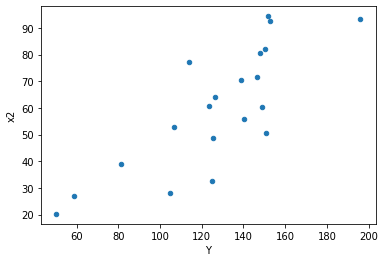

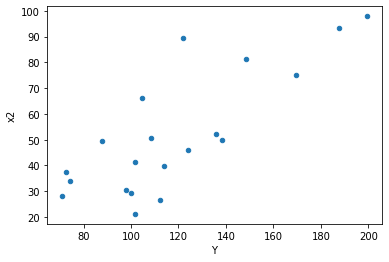

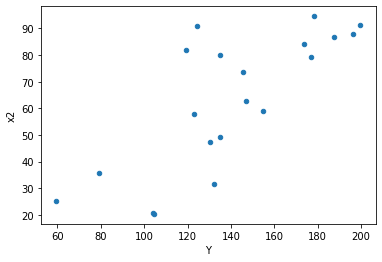

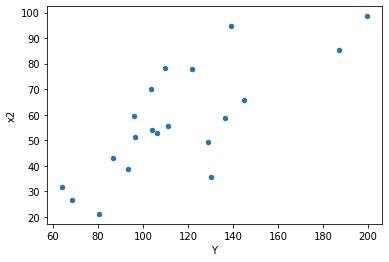

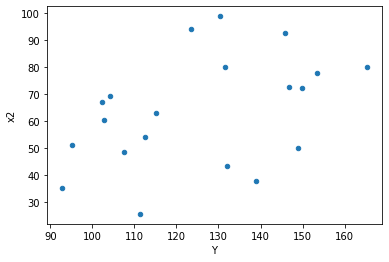

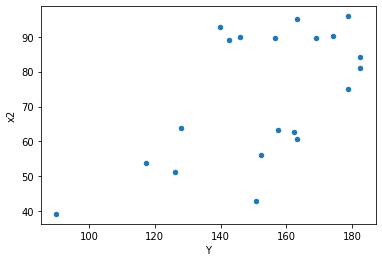

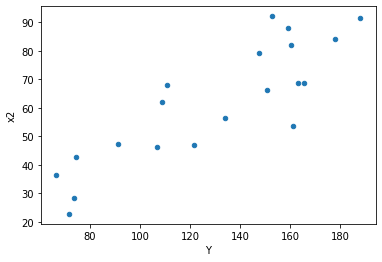

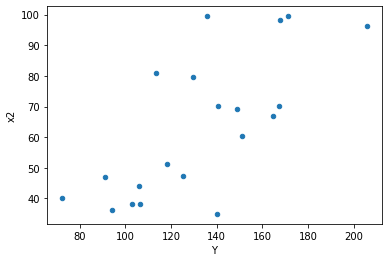

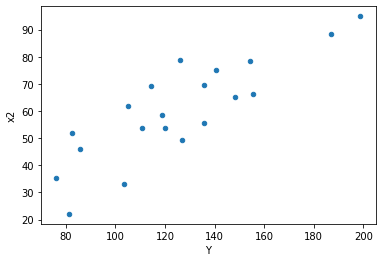

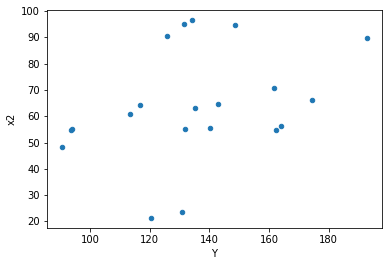

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='Y', y='x2', kind = 'scatter')
tablenew1.plot(x ='Y', y='x2', kind = 'scatter')
tablenew2.plot(x ='Y', y='x2', kind = 'scatter')
tablenew3.plot(x ='Y', y='x2', kind = 'scatter')
tablenew4.plot(x ='Y', y='x2', kind = 'scatter')
tablenew5.plot(x ='Y', y='x2', kind = 'scatter')
tablenew6.plot(x ='Y', y='x2', kind = 'scatter')
tablenew7.plot(x ='Y', y='x2', kind = 'scatter')
tablenew8.plot(x ='Y', y='x2', kind = 'scatter')
tablenew9.plot(x ='Y', y='x2', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,6.0,6.0,1.5930286480290965,1.743767477659169,0.26550477467151606,0.29062791294319484,1.094624054511868,0.9154125682210243,0.5422937158894878,0.4577062841105122,Reject005=1 : Homoscedasticity
4.0,6.0,6.0,1.2641506804708393,2.317494949050871,0.21069178007847322,0.3862491581751452,1.8332426544181493,0.4795427921513098,0.7602286039243451,0.2397713960756549,Reject005=1 : Homoscedasticity
6.0,6.0,6.0,0.9024780034476019,3.2432316784736965,0.1504130005746003,0.5405386130789495,3.5936960968401044,0.14481639343634356,0.9275918032818282,0.07240819671817178,Reject005=1 : Homoscedasticity
7.0,6.0,6.0,0.6158742743132253,2.8967098272765868,0.10264571238553755,0.4827849712127645,4.703410985150777,0.08143828691408594,0.959280856542957,0.04071914345704297,Reject005=1 : Homoscedasticity
8.0,6.0,6.0,0.8188130447441904,2.878230597486562,0.1364688407906984,0.47970509958109364,3.515125480671555,0.1514910928065194,0.9242544535967403,0.0757455464032597,Reject005=1 : Homoscedasticity
9.0,6.0,6.0,0.4838595983379012,2.3141978782408783,0.0806432663896502,0.3856996463734797,4.782787995092676,0.07845189168510958,0.9607740541574452,0.03922594584255479,Reject005=1 : Homoscedasticity
10.0,6.0,6.0,1.5288052208688905,3.2094153597415107,0.25480087014481506,0.5349025599569185,2.0992964413854187,0.38862512166655283,0.8056874391667236,0.19431256083327642,Reject005=1 : Homoscedasticity
11.0,6.0,6.0,0.8205006888380038,3.946612814350505,0.13675011480633395,0.6577688023917508,4.810005485723252,0.07746131692000313,0.9612693415399984,0.038730658460001566,Reject005=1 : Homoscedasticity
14.0,6.0,6.0,0.6278146283029229,0.960581087320556,0.10463577138382048,0.16009684788675935,1.5300393524074947,0.6185325566876623,0.6907337216561689,0.30926627834383114,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,1.5930286480290965,1.743767477659169,0.26550477467151606,0.29062791294319484,1.094624054511868,0.9154125682210243,Reject005=1 : Homoscedasticity
1.0,6.0,6.0,2.060352363665251,1.2003967394483515,0.3433920606108752,0.20006612324139192,0.582617206948482,0.5279578579146376,Reject005=1 : Homoscedasticity
2.0,6.0,6.0,1.3692792496246184,0.3790252245921234,0.22821320827076974,0.0631708707653539,0.2768063743725258,0.1432657683115457,Reject005=1 : Homoscedasticity
3.0,6.0,6.0,2.66515709698942,2.1312006952048543,0.4441928494982366,0.35520011586747574,0.7996529351355212,0.7929830987263495,Reject005=1 : Homoscedasticity
4.0,6.0,6.0,1.2641506804708393,2.317494949050871,0.21069178007847322,0.3862491581751452,1.8332426544181493,0.4795427921513098,Reject005=1 : Homoscedasticity
5.0,6.0,6.0,6.1902018401681955,2.211036730513216,1.0317003066946993,0.3685061217522027,0.3571833015469395,0.23580344098342437,Reject005=1 : Homoscedasticity
6.0,6.0,6.0,0.9024780034476019,3.2432316784736965,0.1504130005746003,0.5405386130789495,3.5936960968401044,0.14481639343634356,Reject005=1 : Homoscedasticity
7.0,6.0,6.0,0.6158742743132253,2.8967098272765868,0.10264571238553755,0.4827849712127645,4.703410985150777,0.08143828691408594,Reject005=1 : Homoscedasticity
8.0,6.0,6.0,0.8188130447441904,2.878230597486562,0.1364688407906984,0.47970509958109364,3.515125480671555,0.1514910928065194,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      843
Reject005=0 : Heteroscedasticity    157
Name: Result_test, dtype: int64